# Data preparation
## Modality 2: Household food and health expenses
This stage has the purpose of preparing the dataset for model training, it consists on:
- Exploratory Data Analysis
- Feature engineering
- Export CSV for unimodal supervised and unsupervised approaches
- Data preparation
    - Merge based on sample dataset key
    - Group setup for LOGO CV
    - Feature scaling

## Setup

### Libraries

In [1]:
import os
import numpy as np
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics, tree, svm, preprocessing
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
import seaborn as sns; sns.set()
from seaborn import heatmap

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Paths

In [2]:
input_path = '../../1_feature_extraction/output/'

output_path = '../output/'

# Global configuration path
glob_conf_path = '../../config/global_config_paper.py'

### Load local variables

In [3]:
exec(open(glob_conf_path).read())

## Exploratory Data Analysis

In [4]:
# Import dataset
m2_dataset = pd.read_csv(os.path.join(input_path, "m2_feature_extraction.csv"))

# See shape
m2_dataset.shape

(10301, 39)

In [5]:
m2_dataset.describe()

,age_months,age_years,BMI_SD,label,exp_fruits,exp_vegetables,exp_corn,exp_bread,exp_grains,exp_oil_sugar,...,exp_hospital,exp_care,exp_alternative_care,exp_dentist,exp_medicine,exp_prosthesis,exp_tests,exp_other_healthcare,exp_insurance,monthly_income
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,...,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,8.331000e+03
mean,137.223765,10.978934,0.886157,0.422969,315.600427,315.192797,152.849044,125.974468,252.214445,227.602854,...,462.457334,513.207941,36.106592,177.626153,3083.093971,109.636346,710.209785,27.587225,7.911174,2.589488e+04
std,47.981703,4.001291,1.121973,0.494055,1362.950360,1335.331618,749.035511,864.494281,1359.481582,1311.611957,...,17197.512080,19736.027862,415.639231,887.979236,52075.278855,827.345201,24133.445299,497.799575,144.444535,1.598566e+05
min,60.000000,5.000000,-0.997984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.800000e+01
25%,96.000000,8.000000,-0.010315,0.000000,40.000000,60.000000,48.000000,0.000000,20.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03
50%,133.000000,11.000000,0.754806,0.000000,100.000000,100.000000,80.000000,40.000000,50.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.200000e+03
75%,178.000000,14.000000,1.680194,1.000000,200.000000,200.000000,135.000000,70.000000,100.000000,70.000000,...,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,1.200000e+04
max,228.000000,19.000000,4.992296,1.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,999999.000000,999999.000000,16800.000000,25000.000000,999999.000000,48000.000000,999999.000000,29000.000000,4800.000000,4.019960e+06


In [6]:
# Check for NaN values
m2_dataset.isnull().mean()*100

house_ID                 0.000000
household_ID             0.000000
person_ID                0.000000
region                   0.000000
strata                   0.000000
locality_type            0.000000
locality_size            0.000000
age_months               0.000000
age_years                0.000000
sex                      0.000000
BMI_SD                   0.000000
label_cat                0.000000
label                    0.000000
exp_fruits               0.000000
exp_vegetables           0.000000
exp_corn                 0.000000
exp_bread                0.000000
exp_grains               0.000000
exp_oil_sugar            0.000000
exp_meat                 0.000000
exp_dairy                0.000000
exp_eggs                 0.000000
exp_snacks               0.000000
exp_fast_food            0.000000
exp_bottled_water        0.000000
exp_soda                 0.000000
exp_alcohol              0.000000
exp_tobacco              0.000000
exp_not_homemade         0.000000
exp_hospital  

A lot of values with the pattern "99...9" can be observed as max value of each feature, since it was used to record "Does not respond or Does not know", those will be substituted by NaN values. 

In [7]:
# Replace 'Does not know/respond' values for NaN values
m2_dataset.replace({99:np.nan}, inplace=True)
m2_dataset.replace({999:np.nan}, inplace=True)
m2_dataset.replace({9999:np.nan}, inplace=True)
m2_dataset.replace({99999:np.nan}, inplace=True)
m2_dataset.replace({999999:np.nan}, inplace=True)
m2_dataset.describe()

,age_months,age_years,BMI_SD,label,exp_fruits,exp_vegetables,exp_corn,exp_bread,exp_grains,exp_oil_sugar,...,exp_hospital,exp_care,exp_alternative_care,exp_dentist,exp_medicine,exp_prosthesis,exp_tests,exp_other_healthcare,exp_insurance,monthly_income
count,10242.000000,10301.000000,10301.000000,10301.000000,10095.000000,10100.000000,10236.000000,10218.000000,10099.000000,10110.000000,...,10298.000000,10297.000000,10301.000000,10301.000000,10270.000000,10298.000000,10295.000000,10301.000000,10301.000000,8.326000e+03
mean,137.443956,10.978934,0.886157,0.422969,125.310154,131.653663,96.919011,50.444901,62.784731,51.367755,...,171.273645,124.945033,36.106592,177.626153,365.022590,109.639445,127.817096,27.587225,7.911174,2.586119e+04
std,48.031672,4.001291,1.121973,0.494055,140.436504,104.910154,109.394526,58.289559,71.570953,49.644345,...,2163.051013,1187.605518,415.639231,887.979236,1663.026103,827.465695,623.232778,497.799575,144.444535,1.598963e+05
min,60.000000,5.000000,-0.997984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.800000e+01
25%,96.000000,8.000000,-0.010315,0.000000,40.000000,60.000000,48.000000,0.000000,20.000000,23.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03
50%,133.000000,11.000000,0.754806,0.000000,100.000000,100.000000,80.000000,38.000000,50.000000,46.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.200000e+03
75%,178.000000,14.000000,1.680194,1.000000,200.000000,200.000000,130.000000,70.000000,100.000000,63.000000,...,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,1.200000e+04
max,228.000000,19.000000,4.992296,1.000000,4010.000000,1000.000000,7075.000000,600.000000,1300.000000,750.000000,...,76000.000000,50000.000000,16800.000000,25000.000000,100000.000000,48000.000000,18000.000000,29000.000000,4800.000000,4.019960e+06


In [8]:
# Percent of NaN values after removing "99...9 patterns"
m2_dataset.isnull().mean()*100

house_ID                 0.000000
household_ID             0.000000
person_ID                0.000000
region                   0.000000
strata                   0.000000
locality_type            0.000000
locality_size            0.000000
age_months               0.572760
age_years                0.000000
sex                      0.000000
BMI_SD                   0.000000
label_cat                0.000000
label                    0.000000
exp_fruits               1.999806
exp_vegetables           1.951267
exp_corn                 0.631007
exp_bread                0.805747
exp_grains               1.960975
exp_oil_sugar            1.854189
exp_meat                 1.271721
exp_dairy                1.077565
exp_eggs                 1.145520
exp_snacks               0.815455
exp_fast_food            0.524221
exp_bottled_water        0.572760
exp_soda                 0.563052
exp_alcohol              0.970780
exp_tobacco              0.961072
exp_not_homemade         0.640714
exp_hospital  

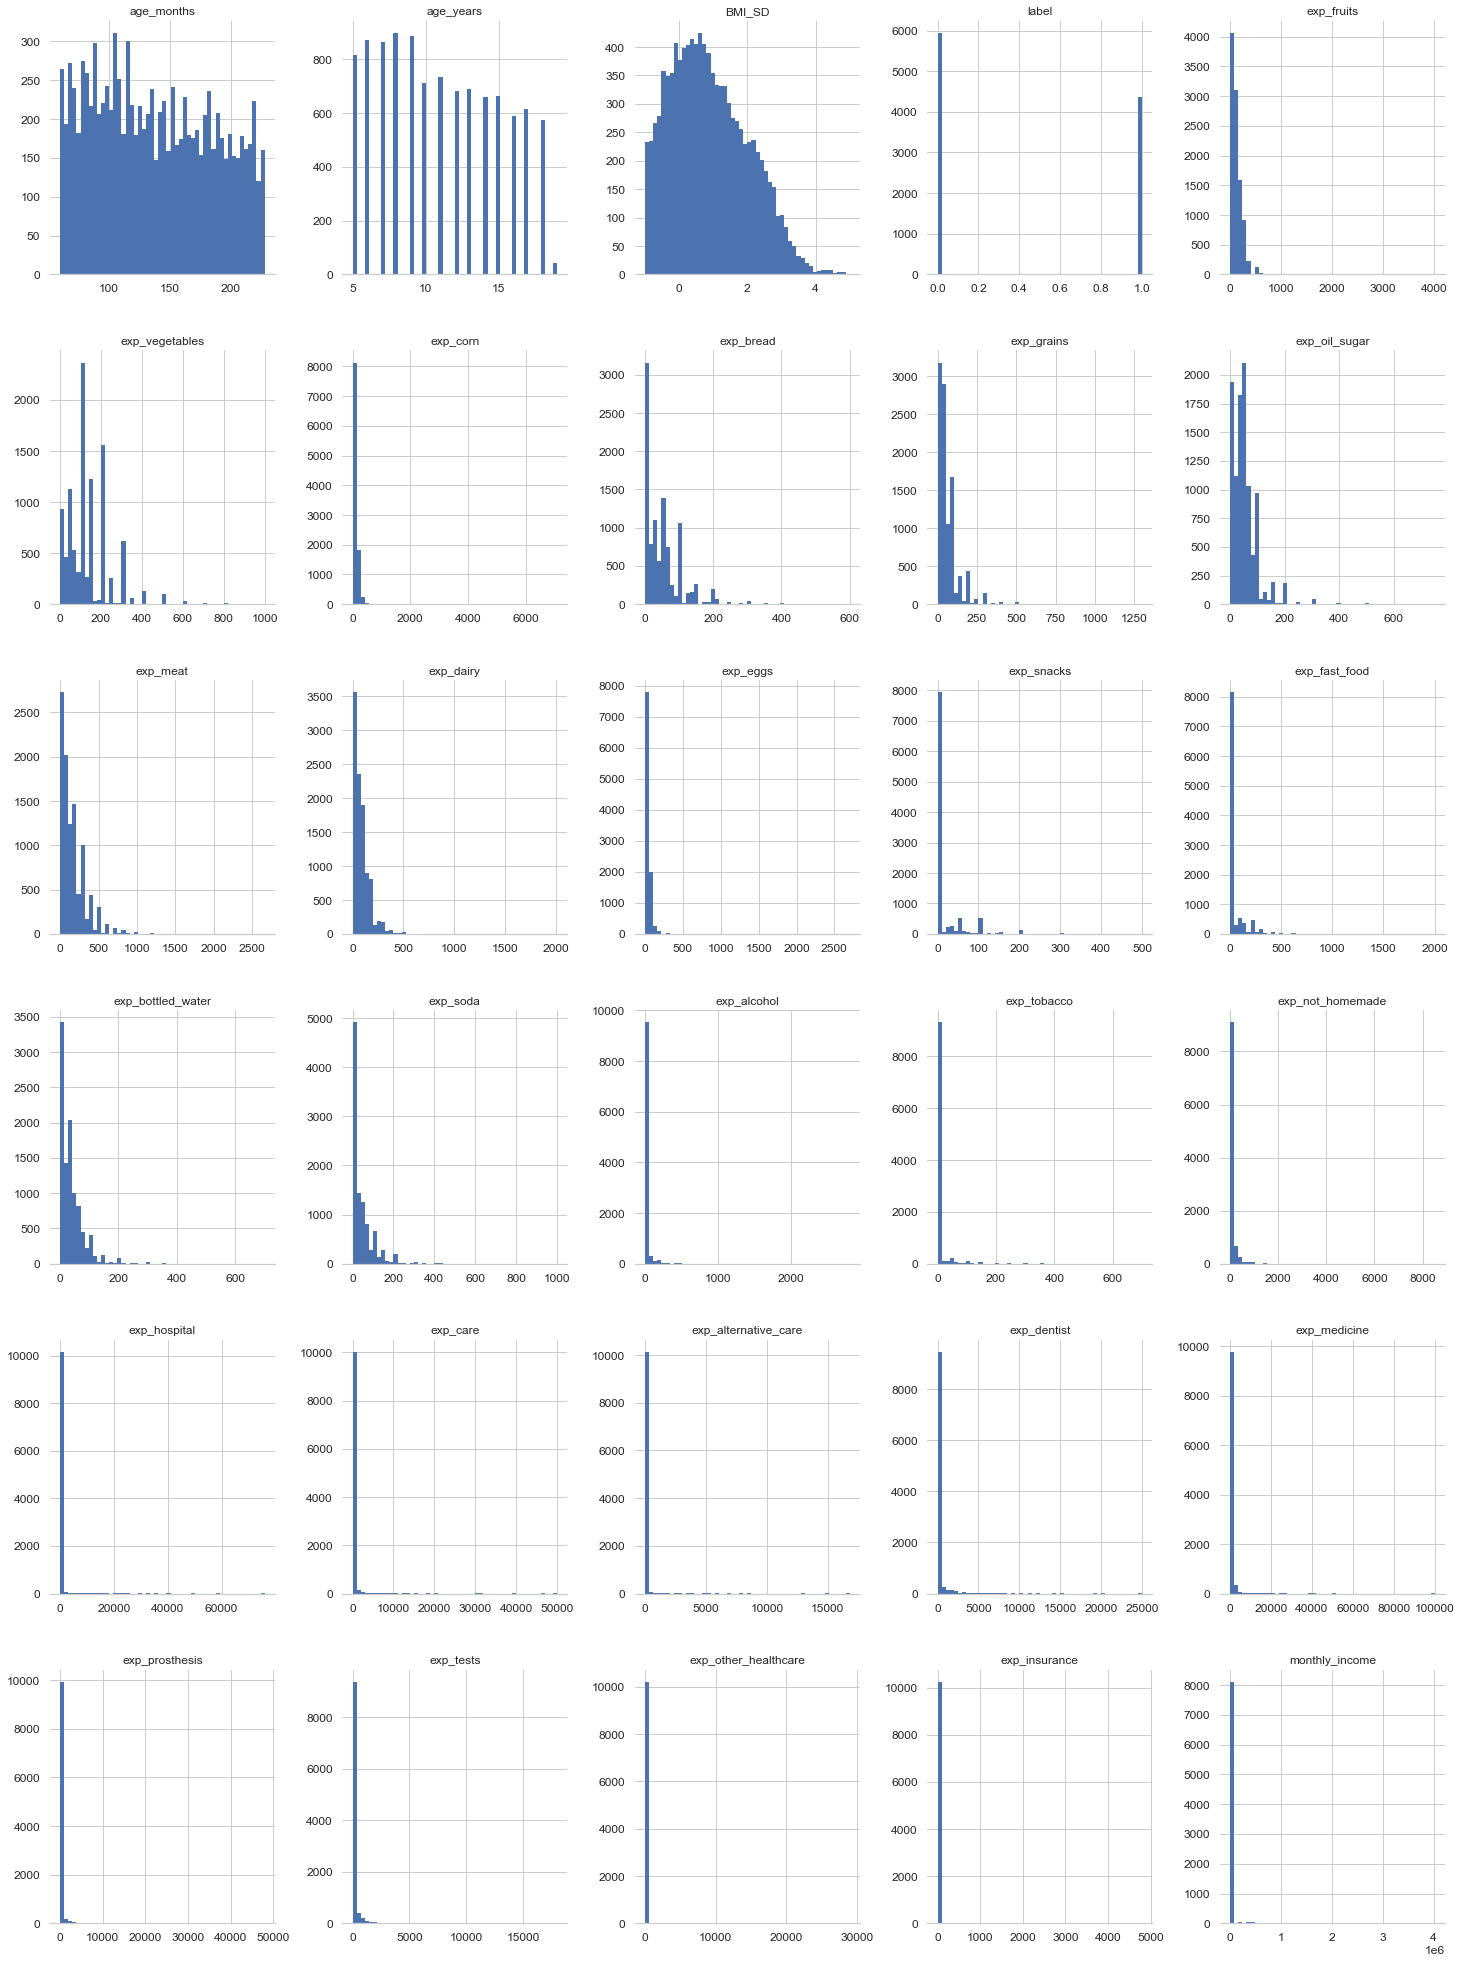

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
m2_dataset.hist(bins=50,figsize=(25,35))
plt.show()

### Check correlations

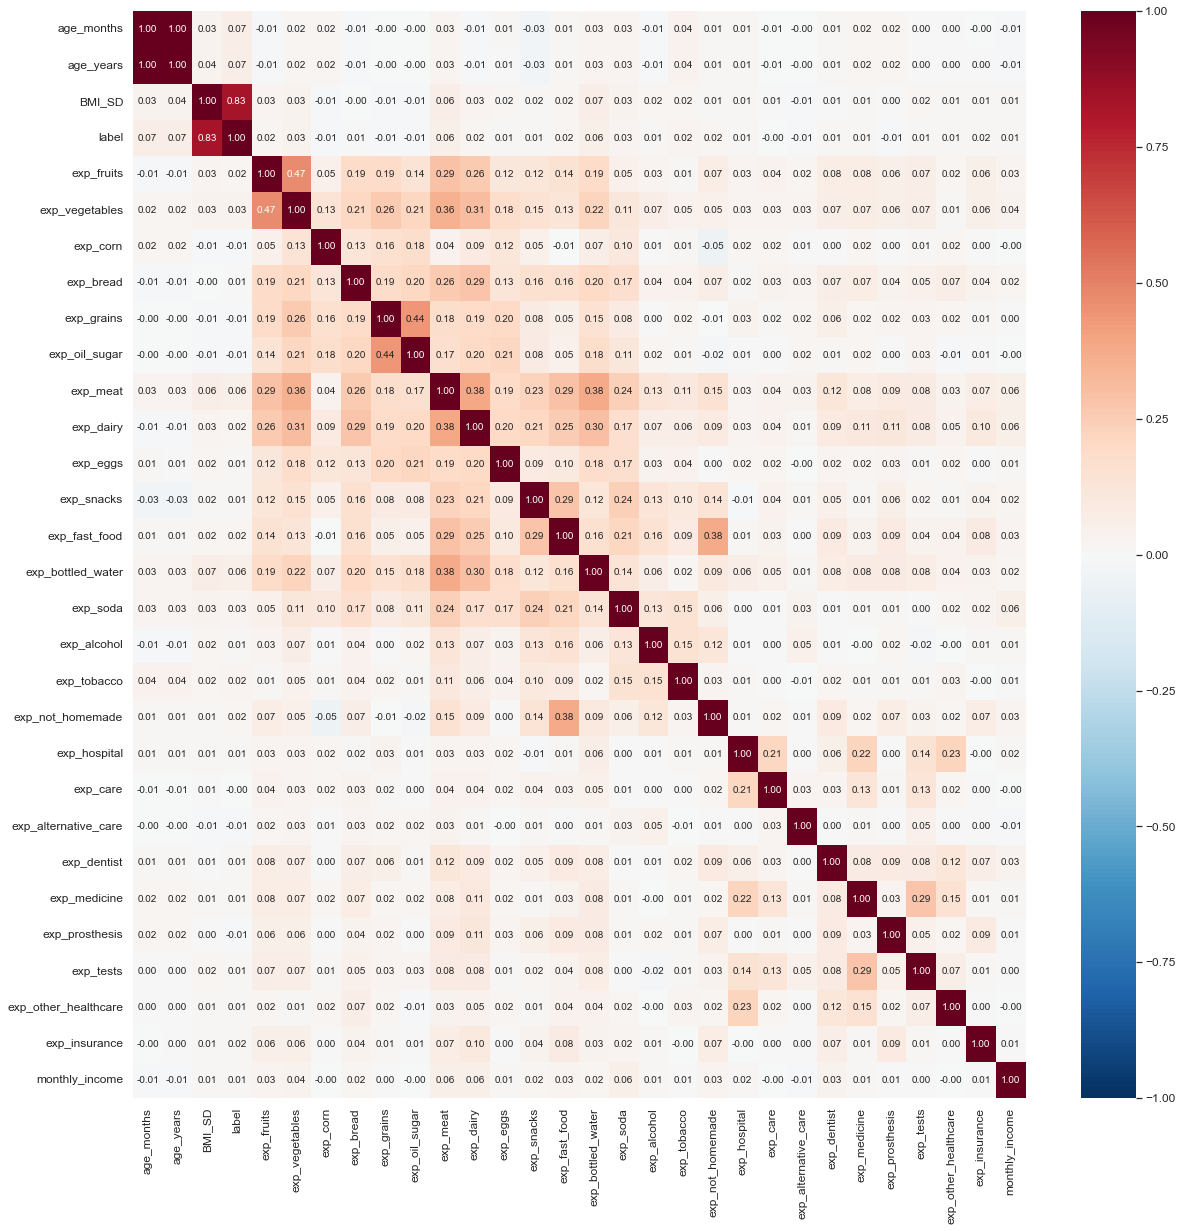

In [10]:
fig, ax = plt.subplots(figsize=(20,20))
ax = heatmap(m2_dataset.corr(), fmt=".2f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1)

## Feature engineering

Due to socioeconomic differences, it would make more sense, however, to have the percentage of the expense per  category rather than the expense per se. Therefore the percentages will be calculated. 

In [11]:
# Calculate total expense per category
m2_dataset["total_food_exp"] = m2_dataset["exp_fruits"] + m2_dataset["exp_vegetables"] + m2_dataset["exp_bottled_water"] + m2_dataset["exp_corn"] + m2_dataset["exp_bread"] + m2_dataset["exp_grains"] + m2_dataset["exp_eggs"] + m2_dataset["exp_meat"] + m2_dataset["exp_dairy"] + m2_dataset["exp_fast_food"] + m2_dataset["exp_snacks"] + m2_dataset["exp_soda"] + m2_dataset["exp_not_homemade"] + m2_dataset["exp_tobacco"] + m2_dataset["exp_alcohol"] + m2_dataset["exp_oil_sugar"]

m2_dataset["total_medical_exp"] = m2_dataset["exp_hospital"] + m2_dataset["exp_care"] +m2_dataset["exp_alternative_care"] + m2_dataset["exp_dentist"] + m2_dataset["exp_medicine"] + m2_dataset["exp_prosthesis"] + m2_dataset["exp_tests"] + m2_dataset["exp_other_healthcare"] + m2_dataset["exp_insurance"]

In [12]:
# Calculate percentages of expense category
m2_dataset_percentage = m2_dataset.copy()

In [13]:
# Replace food expenses with proportion
m2_dataset_percentage["exp_fruits"] = m2_dataset_percentage["exp_fruits"] / m2_dataset_percentage["total_food_exp"] * 100
m2_dataset_percentage["exp_vegetables"] = m2_dataset_percentage["exp_vegetables"] / m2_dataset_percentage["total_food_exp"] * 100
m2_dataset_percentage["exp_bottled_water"] = m2_dataset_percentage["exp_bottled_water"] / m2_dataset_percentage["total_food_exp"] * 100
m2_dataset_percentage["exp_corn"] = m2_dataset_percentage["exp_corn"] / m2_dataset_percentage["total_food_exp"] * 100
m2_dataset_percentage["exp_bread"] = m2_dataset_percentage["exp_bread"] / m2_dataset_percentage["total_food_exp"] * 100
m2_dataset_percentage["exp_grains"] = m2_dataset_percentage["exp_grains"] / m2_dataset_percentage["total_food_exp"] * 100
m2_dataset_percentage["exp_eggs"] = m2_dataset_percentage["exp_eggs"] / m2_dataset_percentage["total_food_exp"] * 100
m2_dataset_percentage["exp_meat"] = m2_dataset_percentage["exp_meat"] / m2_dataset_percentage["total_food_exp"] * 100
m2_dataset_percentage["exp_dairy"] = m2_dataset_percentage["exp_dairy"] / m2_dataset_percentage["total_food_exp"] * 100
m2_dataset_percentage["exp_fast_food"] = m2_dataset_percentage["exp_fast_food"] / m2_dataset_percentage["total_food_exp"] * 100
m2_dataset_percentage["exp_snacks"] = m2_dataset_percentage["exp_snacks"] / m2_dataset_percentage["total_food_exp"] * 100
m2_dataset_percentage["exp_soda"] = m2_dataset_percentage["exp_soda"] / m2_dataset_percentage["total_food_exp"] * 100
m2_dataset_percentage["exp_not_homemade"] = m2_dataset_percentage["exp_not_homemade"] / m2_dataset_percentage["total_food_exp"] * 100
m2_dataset_percentage["exp_tobacco"] = m2_dataset_percentage["exp_tobacco"] / m2_dataset_percentage["total_food_exp"] * 100
m2_dataset_percentage["exp_alcohol"] = m2_dataset_percentage["exp_alcohol"] / m2_dataset_percentage["total_food_exp"] * 100
m2_dataset_percentage["exp_oil_sugar"] = m2_dataset_percentage["exp_oil_sugar"] / m2_dataset_percentage["total_food_exp"] * 100

# Replace medical expenses with proportion
m2_dataset_percentage["exp_hospital"] = m2_dataset_percentage["exp_hospital"] / m2_dataset_percentage["total_medical_exp"] * 100
m2_dataset_percentage["exp_care"] = m2_dataset_percentage["exp_care"] / m2_dataset_percentage["total_medical_exp"] * 100
m2_dataset_percentage["exp_alternative_care"] = m2_dataset_percentage["exp_alternative_care"] / m2_dataset_percentage["total_medical_exp"] * 100
m2_dataset_percentage["exp_dentist"] = m2_dataset_percentage["exp_dentist"] / m2_dataset_percentage["total_medical_exp"] * 100
m2_dataset_percentage["exp_medicine"] = m2_dataset_percentage["exp_medicine"] / m2_dataset_percentage["total_medical_exp"] * 100
m2_dataset_percentage["exp_prosthesis"] = m2_dataset_percentage["exp_prosthesis"] / m2_dataset_percentage["total_medical_exp"] * 100
m2_dataset_percentage["exp_tests"] = m2_dataset_percentage["exp_tests"] / m2_dataset_percentage["total_medical_exp"] * 100
m2_dataset_percentage["exp_other_healthcare"] = m2_dataset_percentage["exp_other_healthcare"] / m2_dataset_percentage["total_medical_exp"] * 100
m2_dataset_percentage["exp_insurance"] = m2_dataset_percentage["exp_insurance"] / m2_dataset_percentage["total_medical_exp"] * 100

In [14]:
m2_dataset_percentage

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,exp_alternative_care,exp_dentist,exp_medicine,exp_prosthesis,exp_tests,exp_other_healthcare,exp_insurance,monthly_income,total_food_exp,total_medical_exp
0,1_4,1_4_1,1_4_1_8,Centre,3rd_strata,urban,">100,000",122.0,10.0,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,1290.0,0.0
1,3_2,3_2_1,3_2_1_5,Centre,2nd_strata,urban,">100,000",149.0,12.0,female,...,0.0,0.0,88.731145,11.268855,0.0,0.0,0.0,3200.0,1135.0,3381.0
2,4_1,4_1_1,4_1_1_4,Centre,2nd_strata,urban,">100,000",162.0,13.0,male,...,0.0,0.0,0.000000,100.000000,0.0,0.0,0.0,20000.0,2130.0,1200.0
3,4_3,4_3_1,4_3_1_5,Centre,2nd_strata,urban,">100,000",197.0,16.0,male,...,0.0,0.0,0.000000,100.000000,0.0,0.0,0.0,NaN,1800.0,3500.0
4,4_5,4_5_1,4_5_1_5,Centre,2nd_strata,urban,">100,000",169.0,14.0,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,1320.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,3938_17,3938_17_1,3938_17_1_3,Centre,2nd_strata,rural,"<2,500",130.0,10.0,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.0,0.0
10297,3938_17,3938_17_1,3938_17_1_4,Centre,2nd_strata,rural,"<2,500",119.0,9.0,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.0,0.0
10298,3938_19,3938_19_1,3938_19_1_3,Centre,2nd_strata,rural,"<2,500",170.0,14.0,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
10299,3938_19,3938_19_1,3938_19_1_5,Centre,2nd_strata,rural,"<2,500",89.0,7.0,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [15]:
# Check percentage of NaN values for the health expenses features
m2_dataset_percentage.isnull().mean()*100

house_ID                 0.000000
household_ID             0.000000
person_ID                0.000000
region                   0.000000
strata                   0.000000
locality_type            0.000000
locality_size            0.000000
age_months               0.572760
age_years                0.000000
sex                      0.000000
BMI_SD                   0.000000
label_cat                0.000000
label                    0.000000
exp_fruits               6.310067
exp_vegetables           6.310067
exp_corn                 6.310067
exp_bread                6.310067
exp_grains               6.310067
exp_oil_sugar            6.310067
exp_meat                 6.310067
exp_dairy                6.310067
exp_eggs                 6.310067
exp_snacks               6.310067
exp_fast_food            6.310067
exp_bottled_water        6.310067
exp_soda                 6.310067
exp_alcohol              6.310067
exp_tobacco              6.310067
exp_not_homemade         6.310067
exp_hospital  

A significant amount of features of health expenses were registered as 0, therefore they become NaN values when calculating the percentage. Since the health feature do not seem to be reliable they will be dropped and only the total health expense will remain. An explanation for the unreliability could be related to the afiliation to the public or private health systems.

In [16]:
# Drop features from the health expense category
del m2_dataset_percentage["exp_hospital"]
del m2_dataset_percentage["exp_care"]
del m2_dataset_percentage["exp_alternative_care"]
del m2_dataset_percentage["exp_dentist"]
del m2_dataset_percentage["exp_medicine"]
del m2_dataset_percentage["exp_prosthesis"]
del m2_dataset_percentage["exp_tests"]
del m2_dataset_percentage["exp_other_healthcare"]
del m2_dataset_percentage["exp_insurance"]

m2_dataset_percentage

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,exp_snacks,exp_fast_food,exp_bottled_water,exp_soda,exp_alcohol,exp_tobacco,exp_not_homemade,monthly_income,total_food_exp,total_medical_exp
0,1_4,1_4_1,1_4_1_8,Centre,3rd_strata,urban,">100,000",122.0,10.0,female,...,3.875969,0.000000,7.751938,0.000000,15.503876,0.000000,0.000000,18000.0,1290.0,0.0
1,3_2,3_2_1,3_2_1_5,Centre,2nd_strata,urban,">100,000",149.0,12.0,female,...,0.000000,0.000000,4.229075,8.810573,0.000000,0.000000,26.431718,3200.0,1135.0,3381.0
2,4_1,4_1_1,4_1_1_4,Centre,2nd_strata,urban,">100,000",162.0,13.0,male,...,0.000000,9.389671,9.859155,4.694836,0.000000,0.000000,0.000000,20000.0,2130.0,1200.0
3,4_3,4_3_1,4_3_1_5,Centre,2nd_strata,urban,">100,000",197.0,16.0,male,...,0.000000,22.222222,2.777778,0.000000,0.000000,0.000000,33.333333,NaN,1800.0,3500.0
4,4_5,4_5_1,4_5_1_5,Centre,2nd_strata,urban,">100,000",169.0,14.0,male,...,0.000000,15.151515,9.090909,6.818182,0.000000,2.651515,0.000000,4000.0,1320.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,3938_17,3938_17_1,3938_17_1_3,Centre,2nd_strata,rural,"<2,500",130.0,10.0,male,...,6.465517,0.000000,7.327586,12.931034,0.000000,0.000000,0.000000,NaN,464.0,0.0
10297,3938_17,3938_17_1,3938_17_1_4,Centre,2nd_strata,rural,"<2,500",119.0,9.0,female,...,6.465517,0.000000,7.327586,12.931034,0.000000,0.000000,0.000000,NaN,464.0,0.0
10298,3938_19,3938_19_1,3938_19_1_3,Centre,2nd_strata,rural,"<2,500",170.0,14.0,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
10299,3938_19,3938_19_1,3938_19_1_5,Centre,2nd_strata,rural,"<2,500",89.0,7.0,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [17]:
m2_dataset_percentage.shape

(10301, 32)

### Check blots and correlations again

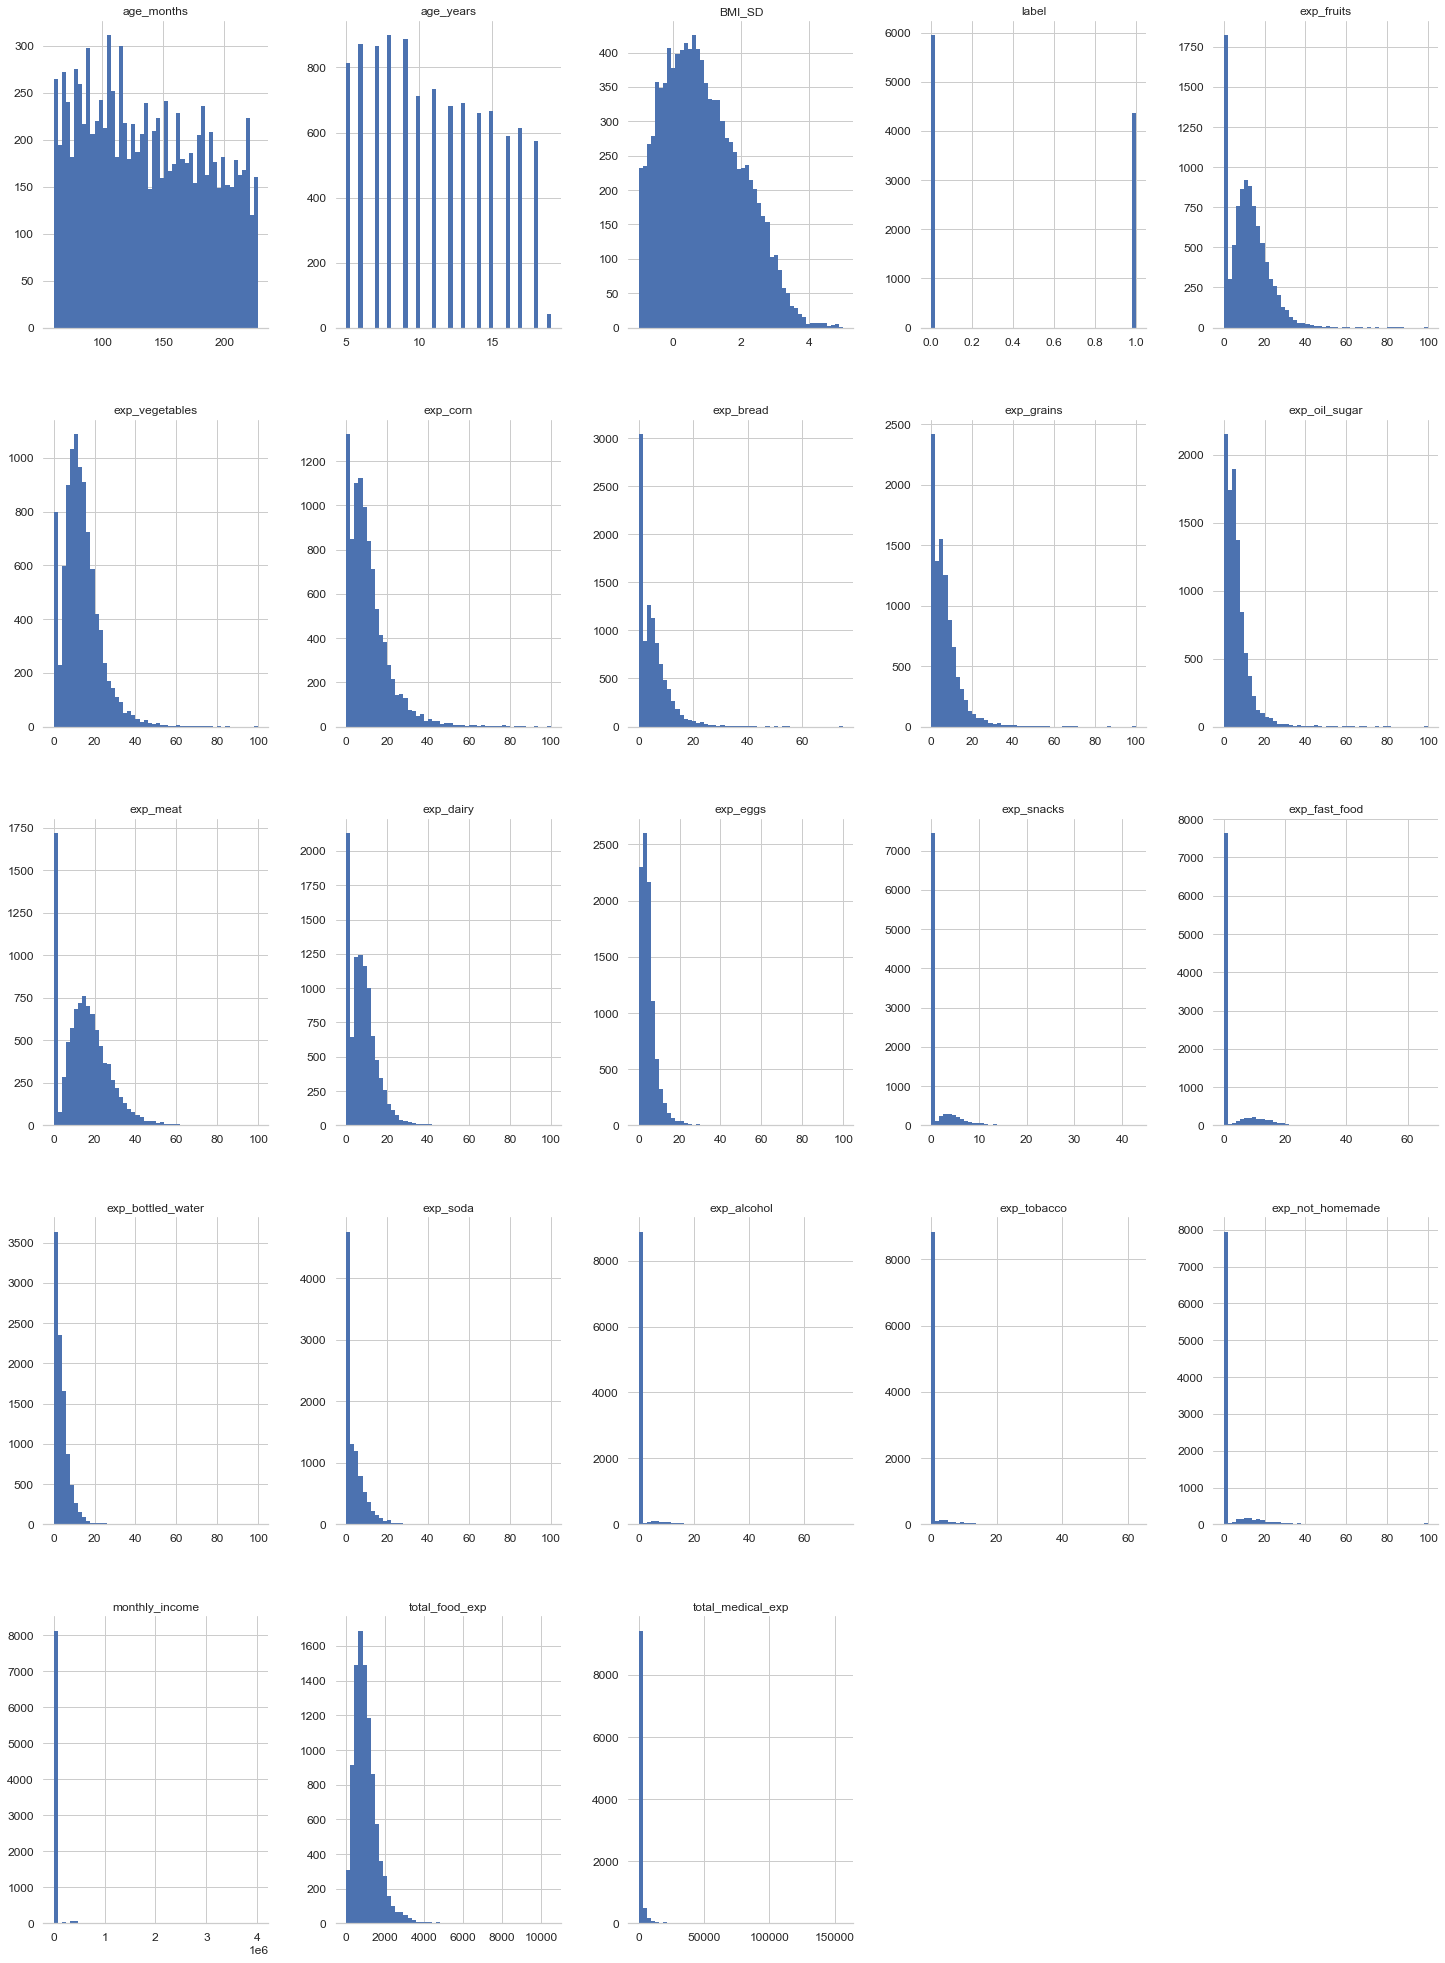

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
m2_dataset_percentage.hist(bins=50,figsize=(25,35))
plt.show()

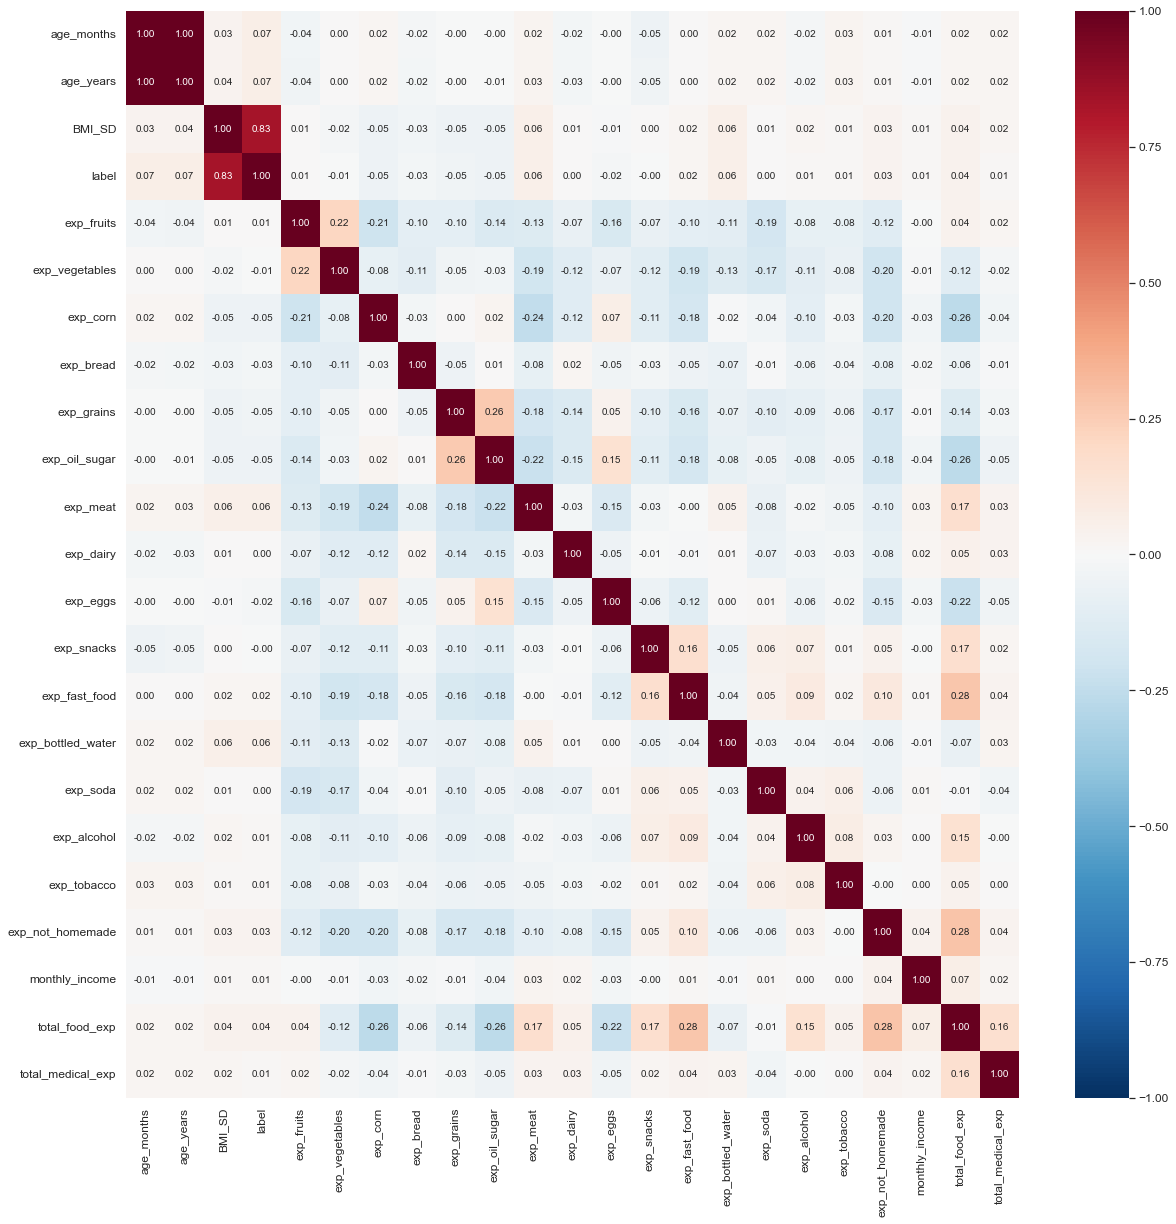

In [19]:
# Plot correlation
fig, ax = plt.subplots(figsize=(20,20))
ax = heatmap(m2_dataset_percentage.corr(), fmt=".2f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1)

In [20]:
m2_dataset_percentage

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,exp_snacks,exp_fast_food,exp_bottled_water,exp_soda,exp_alcohol,exp_tobacco,exp_not_homemade,monthly_income,total_food_exp,total_medical_exp
0,1_4,1_4_1,1_4_1_8,Centre,3rd_strata,urban,">100,000",122.0,10.0,female,...,3.875969,0.000000,7.751938,0.000000,15.503876,0.000000,0.000000,18000.0,1290.0,0.0
1,3_2,3_2_1,3_2_1_5,Centre,2nd_strata,urban,">100,000",149.0,12.0,female,...,0.000000,0.000000,4.229075,8.810573,0.000000,0.000000,26.431718,3200.0,1135.0,3381.0
2,4_1,4_1_1,4_1_1_4,Centre,2nd_strata,urban,">100,000",162.0,13.0,male,...,0.000000,9.389671,9.859155,4.694836,0.000000,0.000000,0.000000,20000.0,2130.0,1200.0
3,4_3,4_3_1,4_3_1_5,Centre,2nd_strata,urban,">100,000",197.0,16.0,male,...,0.000000,22.222222,2.777778,0.000000,0.000000,0.000000,33.333333,NaN,1800.0,3500.0
4,4_5,4_5_1,4_5_1_5,Centre,2nd_strata,urban,">100,000",169.0,14.0,male,...,0.000000,15.151515,9.090909,6.818182,0.000000,2.651515,0.000000,4000.0,1320.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,3938_17,3938_17_1,3938_17_1_3,Centre,2nd_strata,rural,"<2,500",130.0,10.0,male,...,6.465517,0.000000,7.327586,12.931034,0.000000,0.000000,0.000000,NaN,464.0,0.0
10297,3938_17,3938_17_1,3938_17_1_4,Centre,2nd_strata,rural,"<2,500",119.0,9.0,female,...,6.465517,0.000000,7.327586,12.931034,0.000000,0.000000,0.000000,NaN,464.0,0.0
10298,3938_19,3938_19_1,3938_19_1_3,Centre,2nd_strata,rural,"<2,500",170.0,14.0,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
10299,3938_19,3938_19_1,3938_19_1_5,Centre,2nd_strata,rural,"<2,500",89.0,7.0,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


## Export CSV for unimodal supervised and unsupervised approaches

In [21]:
m2_unimodal = m2_dataset_percentage.copy()
m2_unimodal.to_csv(os.path.join(output_path,'m2_unimodal.csv'), index=None, header=True)

## Data preparation

In [22]:
m2_dataset = m2_dataset_percentage
m2_dataset.isnull().mean()*100

house_ID              0.000000
household_ID          0.000000
person_ID             0.000000
region                0.000000
strata                0.000000
locality_type         0.000000
locality_size         0.000000
age_months            0.572760
age_years             0.000000
sex                   0.000000
BMI_SD                0.000000
label_cat             0.000000
label                 0.000000
exp_fruits            6.310067
exp_vegetables        6.310067
exp_corn              6.310067
exp_bread             6.310067
exp_grains            6.310067
exp_oil_sugar         6.310067
exp_meat              6.310067
exp_dairy             6.310067
exp_eggs              6.310067
exp_snacks            6.310067
exp_fast_food         6.310067
exp_bottled_water     6.310067
exp_soda              6.310067
exp_alcohol           6.310067
exp_tobacco           6.310067
exp_not_homemade      6.310067
monthly_income       19.172896
total_food_exp        5.892632
total_medical_exp     0.349481
dtype: f

Since all dimensions have less than 35% missing values all rows containing at least 1 NaN value will be dropped. 

In [23]:
# Drop all rows with missing values
m2_dataset = m2_dataset.dropna()
m2_dataset.reset_index(drop=True, inplace=True)
m2_dataset

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,exp_snacks,exp_fast_food,exp_bottled_water,exp_soda,exp_alcohol,exp_tobacco,exp_not_homemade,monthly_income,total_food_exp,total_medical_exp
0,1_4,1_4_1,1_4_1_8,Centre,3rd_strata,urban,">100,000",122.0,10.0,female,...,3.875969,0.000000,7.751938,0.000000,15.503876,0.000000,0.000000,18000.0,1290.0,0.0
1,3_2,3_2_1,3_2_1_5,Centre,2nd_strata,urban,">100,000",149.0,12.0,female,...,0.000000,0.000000,4.229075,8.810573,0.000000,0.000000,26.431718,3200.0,1135.0,3381.0
2,4_1,4_1_1,4_1_1_4,Centre,2nd_strata,urban,">100,000",162.0,13.0,male,...,0.000000,9.389671,9.859155,4.694836,0.000000,0.000000,0.000000,20000.0,2130.0,1200.0
3,4_5,4_5_1,4_5_1_5,Centre,2nd_strata,urban,">100,000",169.0,14.0,male,...,0.000000,15.151515,9.090909,6.818182,0.000000,2.651515,0.000000,4000.0,1320.0,0.0
4,4_5,4_5_1,4_5_1_6,Centre,2nd_strata,urban,">100,000",114.0,9.0,female,...,0.000000,15.151515,9.090909,6.818182,0.000000,2.651515,0.000000,4000.0,1320.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7814,3937_18,3937_18_1,3937_18_1_4,Centre,2nd_strata,rural,"<2,500",75.0,6.0,female,...,0.000000,0.000000,2.830189,9.433962,0.000000,0.000000,0.000000,8400.0,1060.0,0.0
7815,3937_21,3937_21_1,3937_21_1_3,Centre,2nd_strata,rural,"<2,500",161.0,13.0,male,...,0.000000,0.000000,3.669725,0.000000,0.000000,0.000000,0.000000,4000.0,436.0,0.0
7816,3938_6,3938_6_1,3938_6_1_3,Centre,2nd_strata,rural,"<2,500",121.0,10.0,female,...,6.410256,0.000000,3.846154,0.000000,0.000000,0.000000,0.000000,7200.0,780.0,0.0
7817,3938_6,3938_6_1,3938_6_1_4,Centre,2nd_strata,rural,"<2,500",73.0,6.0,female,...,6.410256,0.000000,3.846154,0.000000,0.000000,0.000000,0.000000,7200.0,780.0,0.0


In [24]:
# Verify no more NaN values remain
m2_dataset.isnull().mean()*100

house_ID             0.0
household_ID         0.0
person_ID            0.0
region               0.0
strata               0.0
locality_type        0.0
locality_size        0.0
age_months           0.0
age_years            0.0
sex                  0.0
BMI_SD               0.0
label_cat            0.0
label                0.0
exp_fruits           0.0
exp_vegetables       0.0
exp_corn             0.0
exp_bread            0.0
exp_grains           0.0
exp_oil_sugar        0.0
exp_meat             0.0
exp_dairy            0.0
exp_eggs             0.0
exp_snacks           0.0
exp_fast_food        0.0
exp_bottled_water    0.0
exp_soda             0.0
exp_alcohol          0.0
exp_tobacco          0.0
exp_not_homemade     0.0
monthly_income       0.0
total_food_exp       0.0
total_medical_exp    0.0
dtype: float64

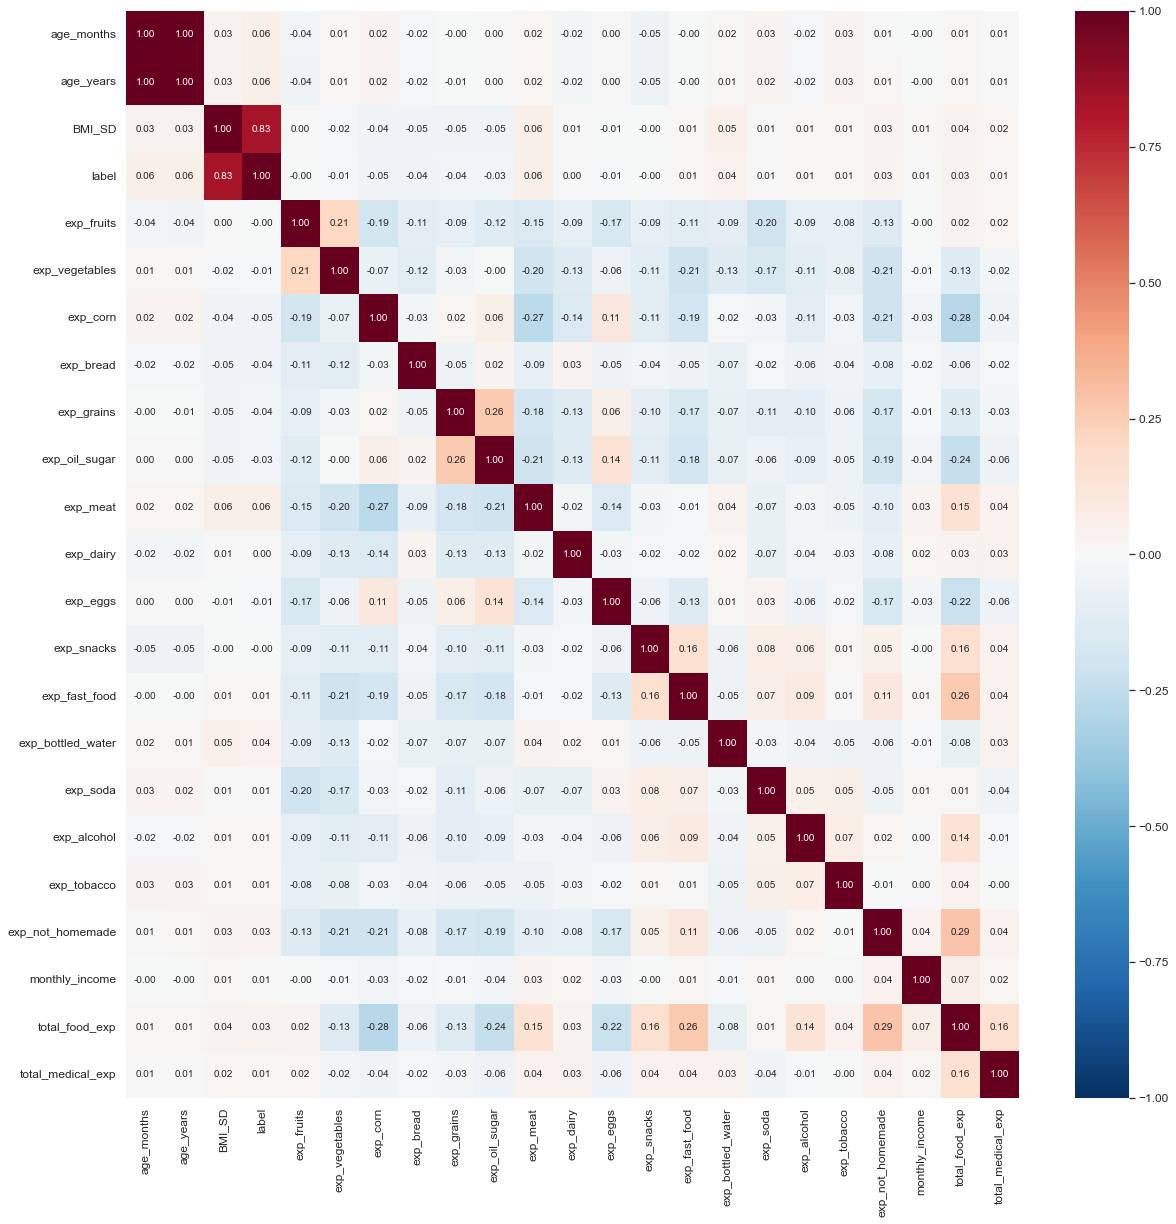

In [25]:
# Plot correlation
fig, ax = plt.subplots(figsize=(20,20))
ax = heatmap(m2_dataset.corr(), fmt=".2f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1)

### Check label distribution

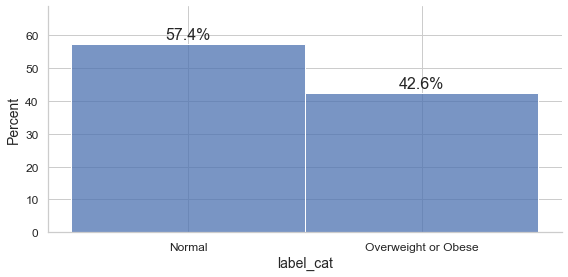

In [26]:
binary_SD_dist = sns.displot(data=m2_dataset, x="label_cat", 
                       height=4, aspect=2, stat='percent')
show_label_percent(binary_SD_dist)
plt.show()

## Group setup for LOGO CV

### Create random groups for the Leave-One-Group-Out Cross-Validation

In [27]:
# Create fair random groups from 1 to 5 as a numpy array and convert it into DataFrame
random_groups = np.random.uniform(1,6,size=len(m2_dataset))
random_groups = pd.DataFrame(random_groups.astype(int))
random_groups = random_groups.rename(columns={0:"group"})
random_groups

,group
0,5
1,4
2,2
3,1
4,4
...,...
7814,5
7815,5
7816,4
7817,1


In [28]:
# Assign group dataframe into column "group"
concat = [m2_dataset, random_groups]
m2_dataset = pd.concat(concat, axis=1)
m2_dataset

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,exp_fast_food,exp_bottled_water,exp_soda,exp_alcohol,exp_tobacco,exp_not_homemade,monthly_income,total_food_exp,total_medical_exp,group
0,1_4,1_4_1,1_4_1_8,Centre,3rd_strata,urban,">100,000",122.0,10.0,female,...,0.000000,7.751938,0.000000,15.503876,0.000000,0.000000,18000.0,1290.0,0.0,5
1,3_2,3_2_1,3_2_1_5,Centre,2nd_strata,urban,">100,000",149.0,12.0,female,...,0.000000,4.229075,8.810573,0.000000,0.000000,26.431718,3200.0,1135.0,3381.0,4
2,4_1,4_1_1,4_1_1_4,Centre,2nd_strata,urban,">100,000",162.0,13.0,male,...,9.389671,9.859155,4.694836,0.000000,0.000000,0.000000,20000.0,2130.0,1200.0,2
3,4_5,4_5_1,4_5_1_5,Centre,2nd_strata,urban,">100,000",169.0,14.0,male,...,15.151515,9.090909,6.818182,0.000000,2.651515,0.000000,4000.0,1320.0,0.0,1
4,4_5,4_5_1,4_5_1_6,Centre,2nd_strata,urban,">100,000",114.0,9.0,female,...,15.151515,9.090909,6.818182,0.000000,2.651515,0.000000,4000.0,1320.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7814,3937_18,3937_18_1,3937_18_1_4,Centre,2nd_strata,rural,"<2,500",75.0,6.0,female,...,0.000000,2.830189,9.433962,0.000000,0.000000,0.000000,8400.0,1060.0,0.0,5
7815,3937_21,3937_21_1,3937_21_1_3,Centre,2nd_strata,rural,"<2,500",161.0,13.0,male,...,0.000000,3.669725,0.000000,0.000000,0.000000,0.000000,4000.0,436.0,0.0,5
7816,3938_6,3938_6_1,3938_6_1_3,Centre,2nd_strata,rural,"<2,500",121.0,10.0,female,...,0.000000,3.846154,0.000000,0.000000,0.000000,0.000000,7200.0,780.0,0.0,4
7817,3938_6,3938_6_1,3938_6_1_4,Centre,2nd_strata,rural,"<2,500",73.0,6.0,female,...,0.000000,3.846154,0.000000,0.000000,0.000000,0.000000,7200.0,780.0,0.0,1


In [29]:
# Verify size, NaN and Dtype of everything
m2_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7819 entries, 0 to 7818
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   house_ID           7819 non-null   object 
 1   household_ID       7819 non-null   object 
 2   person_ID          7819 non-null   object 
 3   region             7819 non-null   object 
 4   strata             7819 non-null   object 
 5   locality_type      7819 non-null   object 
 6   locality_size      7819 non-null   object 
 7   age_months         7819 non-null   float64
 8   age_years          7819 non-null   float64
 9   sex                7819 non-null   object 
 10  BMI_SD             7819 non-null   float64
 11  label_cat          7819 non-null   object 
 12  label              7819 non-null   float64
 13  exp_fruits         7819 non-null   float64
 14  exp_vegetables     7819 non-null   float64
 15  exp_corn           7819 non-null   float64
 16  exp_bread          7819 

### Check group representation

#### Plot distributions to see representation of demographics in the groups

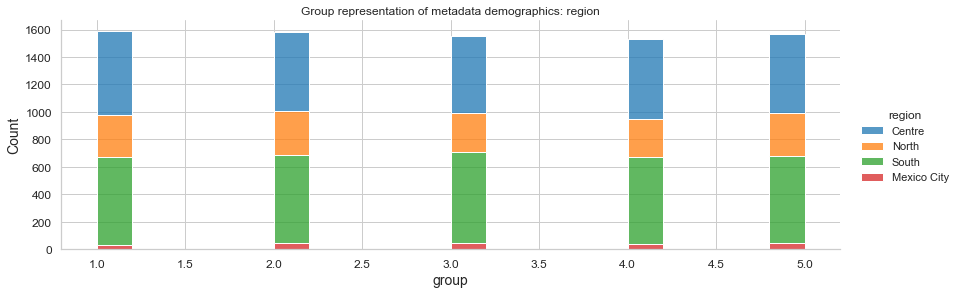

In [30]:
group_region = sns.displot(data=m2_dataset, x="group", hue="region", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: region""")
plt.show(group_region)

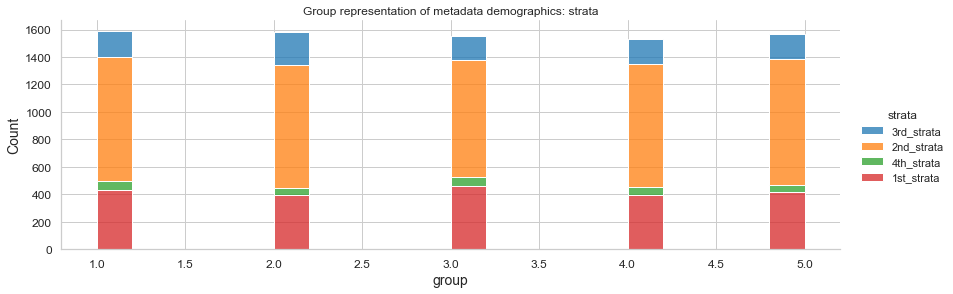

In [31]:
group_strata = sns.displot(data=m2_dataset, x="group", hue="strata", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: strata""")

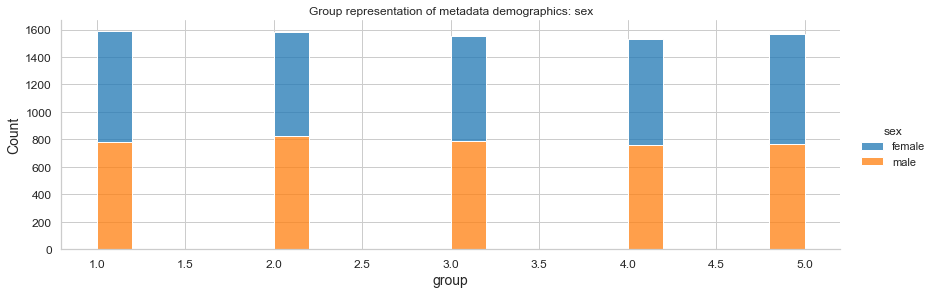

In [32]:
group_sex = sns.displot(data=m2_dataset, x="group", hue="sex", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: sex""")
plt.show(group_sex)

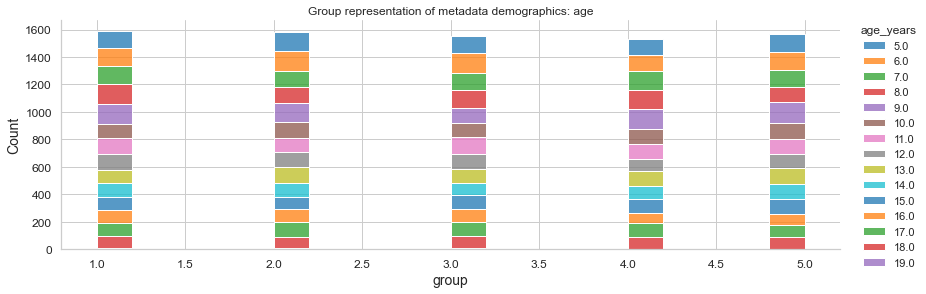

In [33]:
group_age_years = sns.displot(data=m2_dataset, x="group", hue="age_years", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: age""")

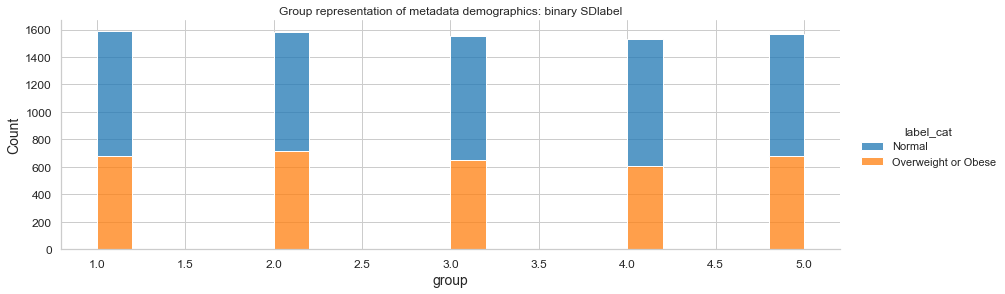

In [34]:
group_label_cat = sns.displot(data=m2_dataset, x="group", hue="label_cat", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: binary SDlabel""")
plt.show(group_label_cat)

### Remove metadata

In [35]:
# Remove unnecesary metadata keeping only the label_cat
m2_dataset = m2_dataset.drop(columns=["person_ID","house_ID","household_ID",
                                      "region","strata","locality_type","locality_size",
                                      "sex","age_months","age_years","BMI_SD","label_cat"])
m2_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7819 entries, 0 to 7818
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   label              7819 non-null   float64
 1   exp_fruits         7819 non-null   float64
 2   exp_vegetables     7819 non-null   float64
 3   exp_corn           7819 non-null   float64
 4   exp_bread          7819 non-null   float64
 5   exp_grains         7819 non-null   float64
 6   exp_oil_sugar      7819 non-null   float64
 7   exp_meat           7819 non-null   float64
 8   exp_dairy          7819 non-null   float64
 9   exp_eggs           7819 non-null   float64
 10  exp_snacks         7819 non-null   float64
 11  exp_fast_food      7819 non-null   float64
 12  exp_bottled_water  7819 non-null   float64
 13  exp_soda           7819 non-null   float64
 14  exp_alcohol        7819 non-null   float64
 15  exp_tobacco        7819 non-null   float64
 16  exp_not_homemade   7819 

## Feature scaling

In [36]:
# Separate metadata
metadata_df = m2_dataset[["label","group"]]

# Standardize values
X = m2_dataset.drop(columns=["label","group"])  # Get features from training set
scaler = preprocessing.MinMaxScaler()                                         # Standard scaler
X_norm = scaler.fit_transform(X)                                              # Fit and transform features
X_norm_df = pd.DataFrame(data=X_norm, columns=X.columns.to_list())          # Create a dataframe from normalized features

# Concatenate scaled dataframe and metadata
train_m2_norm_df = pd.concat([X_norm_df,metadata_df], axis=1)
train_m2_norm_df

,exp_fruits,exp_vegetables,exp_corn,exp_bread,exp_grains,exp_oil_sugar,exp_meat,exp_dairy,exp_eggs,exp_snacks,...,exp_bottled_water,exp_soda,exp_alcohol,exp_tobacco,exp_not_homemade,monthly_income,total_food_exp,total_medical_exp,label,group
0,0.088605,0.136628,0.108527,0.031008,0.089922,0.038760,0.155039,0.131078,0.054264,0.090439,...,0.077519,0.000000,0.209302,0.000000,0.000000,0.004473,0.121519,0.000000,0.0,5
1,0.000000,0.000000,0.028194,0.070485,0.204405,0.132159,0.000000,0.248298,0.055507,0.000000,...,0.042291,0.123505,0.000000,0.000000,0.264317,0.000792,0.106734,0.038773,0.0,4
2,0.134155,0.137911,0.046948,0.062598,0.054460,0.032864,0.234742,0.099232,0.065728,0.000000,...,0.098592,0.065812,0.000000,0.000000,0.000000,0.004971,0.201641,0.013761,1.0,2
3,0.086591,0.089015,0.056818,0.101010,0.087879,0.037879,0.151515,0.106749,0.053030,0.000000,...,0.090909,0.095576,0.000000,0.042487,0.000000,0.000991,0.124380,0.000000,1.0,1
4,0.086591,0.089015,0.056818,0.101010,0.087879,0.037879,0.151515,0.106749,0.053030,0.000000,...,0.090909,0.095576,0.000000,0.042487,0.000000,0.000991,0.124380,0.000000,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7814,0.215660,0.088679,0.084906,0.075472,0.065660,0.066038,0.188679,0.132933,0.092453,0.000000,...,0.028302,0.132244,0.000000,0.000000,0.000000,0.002085,0.099580,0.000000,1.0,5
7815,0.000000,0.000000,0.344037,0.305810,0.000000,0.000000,0.000000,0.387823,0.160550,0.000000,...,0.036697,0.000000,0.000000,0.000000,0.000000,0.000991,0.040061,0.000000,0.0,5
7816,0.000000,0.451923,0.192308,0.085470,0.089231,0.038462,0.000000,0.126457,0.071795,0.149573,...,0.038462,0.000000,0.000000,0.000000,0.000000,0.001787,0.072873,0.000000,0.0,4
7817,0.000000,0.451923,0.192308,0.085470,0.089231,0.038462,0.000000,0.126457,0.071795,0.149573,...,0.038462,0.000000,0.000000,0.000000,0.000000,0.001787,0.072873,0.000000,0.0,1


In [37]:
train_m2_norm_df.shape

(7819, 21)

## Export datasets

In [38]:
# Export standardized dataset
train_m2_norm_df.to_csv(os.path.join(output_path,'train_m2_norm_df.csv'), index=None, header=True)